In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

1) Aplique nas imagens abaixo o algortimo Watershed para realizar a contagem de células. Faça tanto para  a imagem original e para a imagem gradiente

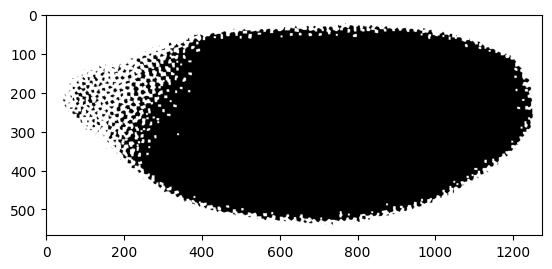

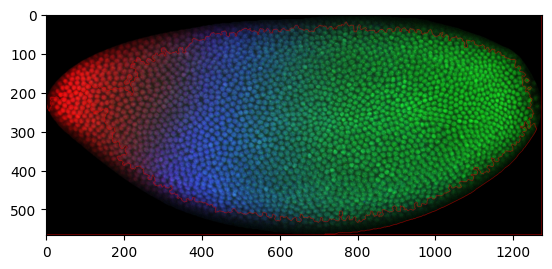

3


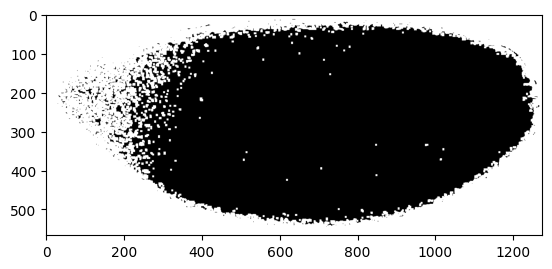

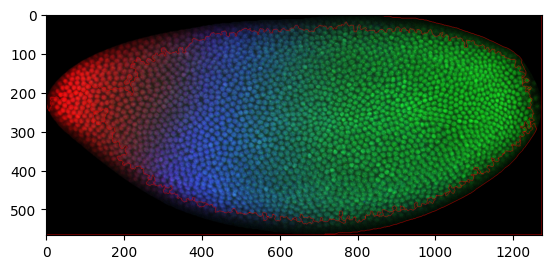

3


In [147]:
def watershed_img(img_path):
    # img = cv2.imread(f'{img_path}')
    # gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #
    # # Aplicar a transformação morfológica de gradiente
    # gradiente = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))

    #Binarizacao da imagem por OTSU
    ret, img_otsu = cv2.threshold(img_path,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # remove ruidos da imagem
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    kernel = np.ones((3,3), np.uint8)
    opening  = cv2.morphologyEx(img_otsu,cv2.MORPH_OPEN, kernel, iterations=2)
    #opening = cv2.morphologyEx(img_otsu, cv2.MORPH_OPEN, kernel)

    # Exibir a imagem após a remoção de ruído
    plt.imshow(opening, cmap='gray', vmin=0, vmax=255)
    plt.show()

    # sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # plano de fundo da imagem
    dist = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist, 0.7 * dist.max(), 255, cv2.THRESH_BINARY)

    # aréa desconhecida
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    ret, markers = cv2.connectedComponents(sure_fg)

    markers += 1
    # marca regiao desconhecida como 0
    markers[unknown == 255] = 0

    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]

    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

    num_items = len(np.unique(markers)) - 1
    print(num_items)


img_original = 'image.jpg'
img = cv2.imread(f'{img_original}')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Aplicar a transformação morfológica de gradiente
gradiente = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))
watershed_img(gray)
watershed_img(gradiente)

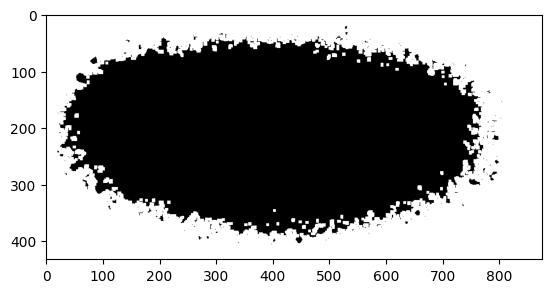

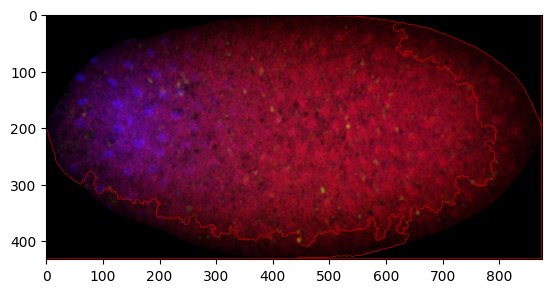

4


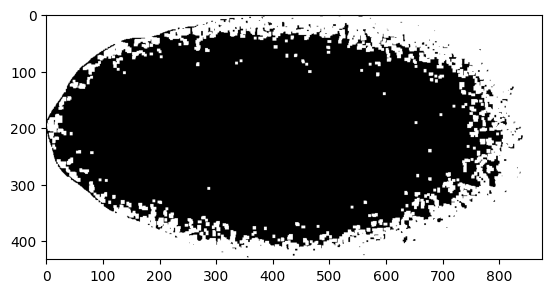

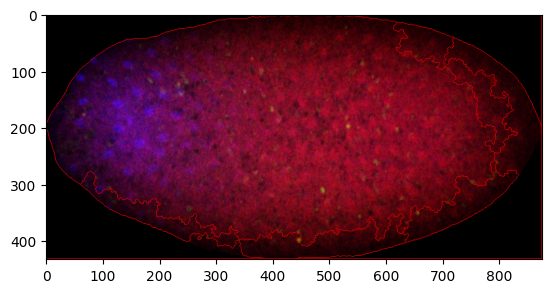

5


In [148]:
img_original = 'image2.jpg'
img = cv2.imread(f'{img_original}')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Aplicar a transformação morfológica de gradiente
gradiente = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))
watershed_img(gray)
watershed_img(gradiente)

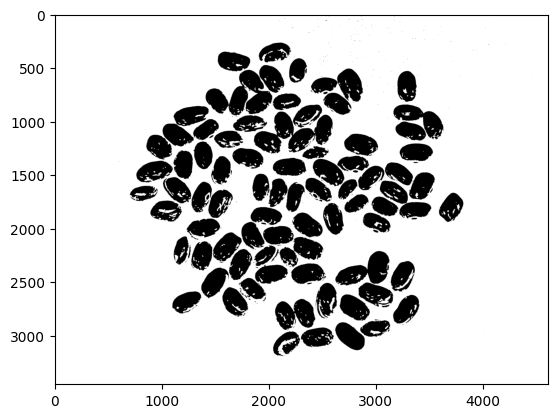

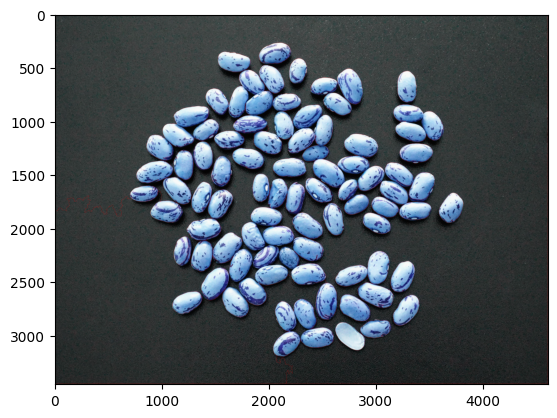

3


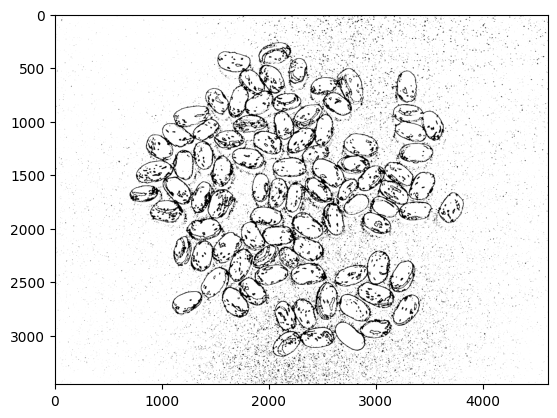

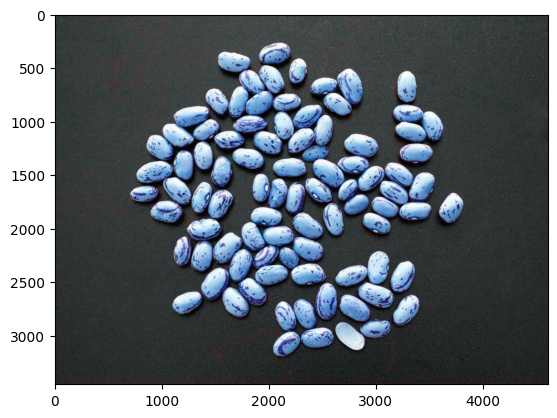

22


In [149]:
img_original = 'feijao.jpg'
img = cv2.imread(f'{img_original}')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Aplicar a transformação morfológica de gradiente
gradiente = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))
watershed_img(gray)
watershed_img(gradiente)